# Part2 - TESTING 

# Installing required dependencies

In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.3 MB/s 
     |████████████████████████████████| 1.3 MB 47.2 MB/s 


# Importing Required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from mtcnn import MTCNN  # helps in detecting faces from image
from tensorflow.keras.models import load_model

2021-10-21 12:35:29.281705: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-21 12:35:29.281849: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Loading Model

In [ ]:
model = load_model('../input/facialemotionrecognition-vgg19/model_optimal.h5')
print('Model Loaded 100%')

2021-10-21 12:35:35.343077: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-21 12:35:35.346294: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-21 12:35:35.346362: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-21 12:35:35.346409: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (2ad1d29f26a6): /proc/driver/nvidia/version does not exist
2021-10-21 12:35:35.346777: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

Model Loaded 100%


# Test Image

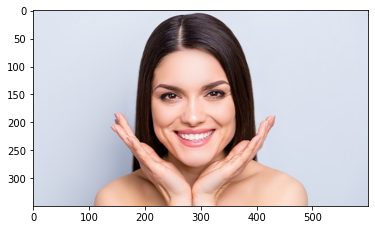

In [ ]:
img = 'https://static-bebeautiful-in.unileverservices.com/Unlock-flawless-skin_MobileHomeFeature.jpg'
try:
    image = plt.imread(img)
except SyntaxError:
    image = plt.imread(img, format='jpg')
plt.imshow(image)

## Detecting Face

2021-10-21 12:35:39.121761: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-21 12:35:39.136424: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200135000 Hz


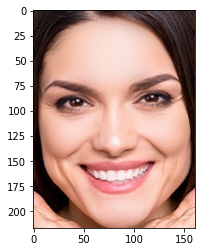

In [ ]:
detect = MTCNN()
results = detect.detect_faces(image)

x1, y1, width, height = results[0]['box']
x2, y2 = x1 + width, y1 + height

face = image[y1:y2, x1:x2]
plt.imshow(face)

## Resizing Image

In [ ]:
test_image = np.resize(face, (224,224,1))

# Prediction

In [ ]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

test_img = np.expand_dims(test_image, axis = 0)
test_img = test_img.reshape(-1,224,224,1)
result = model.predict(test_img)
result = list(result[0])

img_index = result.index(max(result))
emotion = label_dict[img_index]
print(emotion)

Happy


## Song Playing as per mood

In [ ]:
from IPython.display import Audio
song_path = '../input/emotion-audio-files/Ringtones'
song = os.path.join(song_path,emotion)
print(f'Playing {emotion} song')
Audio(song + '.mp3', autoplay=True)

Playing Happy song
